# Exploratory Data Analysis on Performance Data

## Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Performance Data into dataframe

In [6]:
df = pd.read_csv('/home/tewodros_cheru/Challenge_Data/performance_data.csv')

## Basic information

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       905 non-null    object 
 1   preview_link  905 non-null    object 
 2   ER            905 non-null    float64
 3   CTR           905 non-null    float64
dtypes: float64(2), object(2)
memory usage: 28.4+ KB


### Printing rows

In [8]:
df

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443
...,...,...,...,...
900,2443bd3b890824acecbe32659b9a1246,https://s3.eu-west-1.amazonaws.com/a.futureadl...,0.365997,0.008790
901,7ed73c1cc404f9956d26c5f58de72b2f,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103055,0.043215
902,90455f5ace15860874965eabd081b6f2,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.191425,0.038692
903,adunit-chevy-hotspot-cpe-av-mpu,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.073058,0.000057


### Descriptive Statistics

In [21]:
df.describe()

,ER,CTR
count,905.000000,905.000000
mean,0.136318,0.034466
std,0.091524,0.036967
min,0.000000,0.000000
25%,0.070338,0.007926
50%,0.118624,0.024537
75%,0.190722,0.047796
max,0.524498,0.297410


## Checking for null values

In [9]:
df.isnull().sum()

game_id         0
preview_link    0
ER              0
CTR             0
dtype: int64

## Plot of ER vs CTR

### Comparing the distribution of ER and CTR

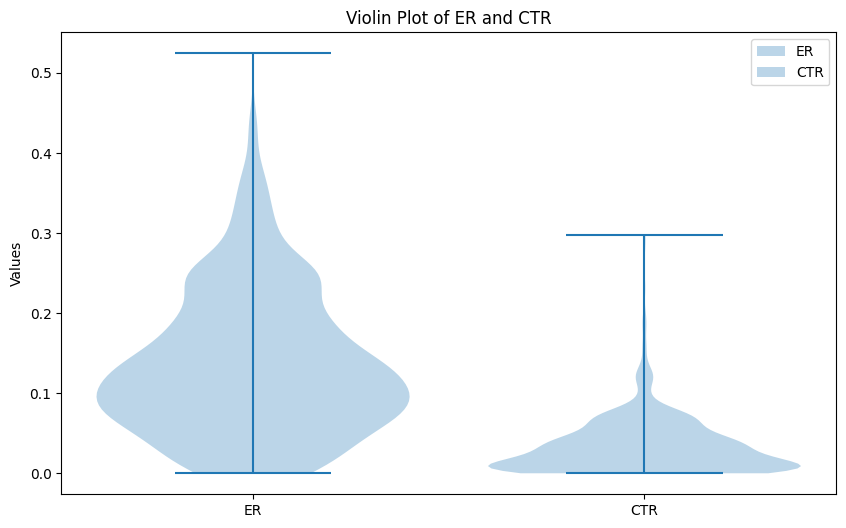

In [12]:
plt.figure(figsize=(10, 6)) 
plt.violinplot([df['ER'], df['CTR']], positions=[0, 1], widths=0.8)
plt.xticks([0, 1], ['ER', 'CTR']) 
plt.title('Violin Plot of ER and CTR')
plt.ylabel('Values')

plt.legend(['ER', 'CTR'])

plt.show()

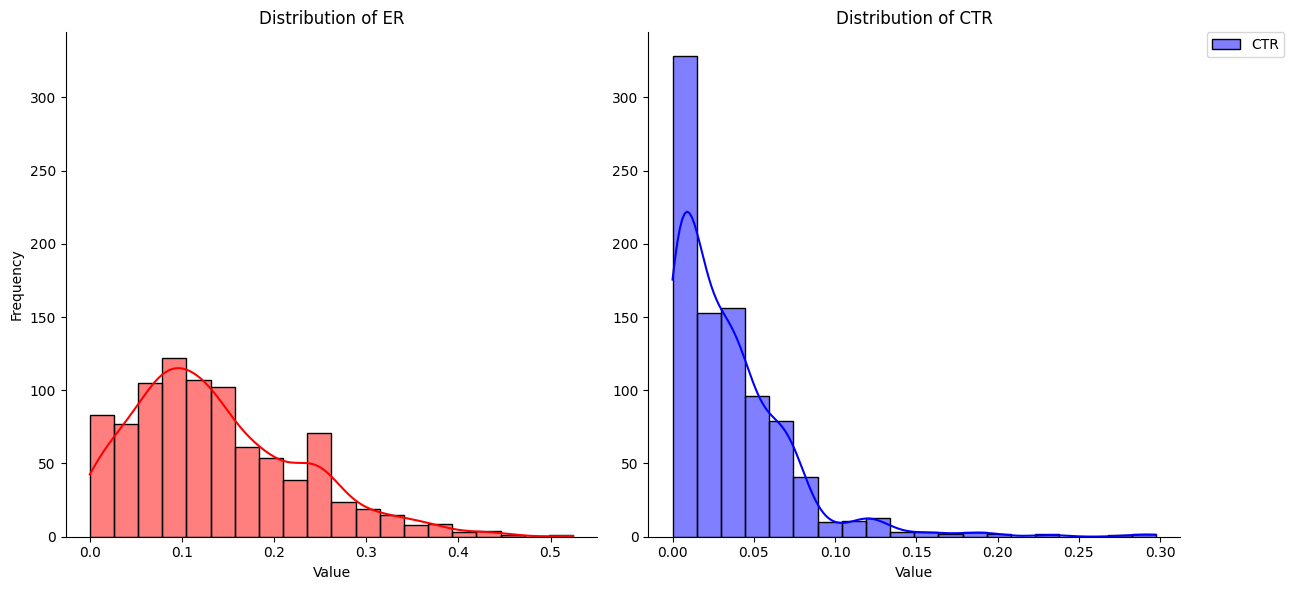

In [16]:
f, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.histplot(df['ER'], bins=20, kde=True, color='red', label='ER', ax=axs[0])
sns.histplot(df['CTR'], bins=20, kde=True, color='blue', label='CTR', ax=axs[1])

axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of ER')
axs[1].set_xlabel('Value')
axs[1].set_title('Distribution of CTR')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Add legend outside the plots
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

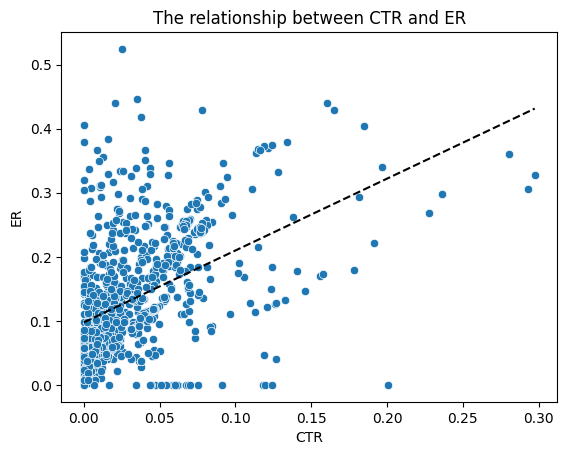

In [19]:
from scipy.stats import linregress
import numpy as np

# Scatter plot
sns.scatterplot(x='CTR', y='ER', data=df)

# Linear regression trendline
slope, intercept, r_value, p_value, std_err = linregress(df['CTR'], df['ER'])
x_line = np.linspace(df['CTR'].min(), df['CTR'].max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='black', linestyle='--')

plt.xlabel('CTR')
plt.ylabel('ER')
plt.title('The relationship between CTR and ER')
plt.show()